# Tetraneuris Grandiflora - Old-Man-of-the-Mountain in Rocky Mountain National Park

### Description of Tetraneuris Grandiflora 

from https://www.fs.usda.gov/wildflowers/plant-of-the-week/tetraneuris_grandiflora.shtml

Tetraneuris Grandiflora, aka Old-Man-of-the-Mountain, is a striking wildflower found in the US Rocky Mountains and assosiated ranges in Colorado, Utah, Wyoming, Idaho, and Montana.  It has a yellow sun flower like appearance (another name it goes by is alpine sunflower) and is apart of the sunflower family.  The flower always faces east, is no taller than 12 inches, and only blooms onces during its 12-15 year life, than dies.  It is found above timberline and flowers between June and August

## For Week 1 of Challenge 
Create your project GitHub repository with a README, license, .gitignore, and at least one Jupyter notebook.
Choose your species, if you are not using our example of sorghastrum nutans. We do recommend that you use a plant species, so that the data we are accessing is the most useful.
Define at least TWO study sites using a shapefile. If you are using the example, you can download the U.S. National Grassland boundaries. For some other species, that might not make as much sense -- you could consider looking at county boundaries or national parks. Keep in mind that some of our data sources only cover the continental U.S., so you should pick something in that area.
As we did with the multispectral data in the redlining coding challenge, download, process, merge, and plot a variable from the POLARIS soil dataset. pH is a good place to start if you aren't sure what to do -- you should be able to find good information about what pH range is suitable for sorghastrum nutans and many other plant species. Note that this soil data is hopefully a bit easier to process because 1) there are no spectral bands to manage and 2) there are no clouds to mask in this image.

## Set up the Analysis 

In [18]:
# import packages 
import rioxarray as rxr
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil, floor
import pathlib
import os
import geopandas as gpd
from glob import glob
from io import BytesIO
import zipfile
import requests
import cartopy.crs as ccrs # CRSs



In [19]:
#set up data directory
habitat_data_dir = os.path.join(
    # Home directory
    pathlib.Path.home(),
    # Earth analytics data directory
    'earth-analytics',
    'data',
    # Project directory
    'habitat-project-directory-Nolan-Welsh',
)
os.makedirs(habitat_data_dir, exist_ok=True)

soil_data_dir = os.path.join(habitat_data_dir,'soil')

os.makedirs(soil_data_dir, exist_ok=True)

habitat_data_dir

'C:\\Users\\Nolan Welsh\\earth-analytics\\data\\habitat-project-directory-Nolan-Welsh'

## Define Area of intrestet 

In [20]:
# URL for shape file for area on intrest  

nps_url = (
    "https://irma.nps.gov/"
    "DataStore/"
    "DownloadFile/"
    "709589/"
    #"Administrative_Boundaries of_National_Park_System_Units.gdb.zip"
)

#download shape file 

# Set up a path to save the data
nps_dir = os.path.join(habitat_data_dir, 'nps_boundaries')
# Make the National Park Service Boundaries directory
os.makedirs(nps_dir, exist_ok=True)
# Join ecoregions shapefile path
boundaries_path = os.path.join(nps_dir, 'Administrative_Boundaries of_National_Park_System_Units.gdb.zip')

# Only download once
if not os.path.exists(boundaries_path):
   #Get File with requests
   response = requests.get(nps_url, stream=True)
   #save URL Content to file
   with open(boundaries_path, "wb") as file:
      #use Chunk to avoid memory overload 
      for chunk in response.iter_content(chunk_size=8192):
         file.write(chunk)

nps_gdf=gpd.read_file(boundaries_path)

nps_gdf
#os.listdir(boundaries_path)




# Make a site map 

,OBJECTID,UNIT_CODE,GIS_Notes,UNIT_NAME,DATE_EDIT,STATE,REGION,GNIS_ID,UNIT_TYPE,CREATED_BY,...,PARKNAME,CreationDa,Creator,EditDate,Editor,GlobalID,Shape_Leng,Shape_Length,Shape_Area,geometry
0,1.0,BICA,Lands - http://landsnet.nps.gov/tractsnet/docu...,Bighorn Canyon National Recreation Area,20240906,MT,IM,767934,National Recreation Area,Lands,...,Bighorn Canyon,,NPS_WASO_LANDS,20241001105621,NPS_WASO_LANDS,{C979F9CA-5066-408E-AED1-2A3C7DE7DF56},0.0,3.294116,5.545438e-02,"MULTIPOLYGON (((-108.37606 44.83653, -108.3760..."
1,2.0,HALE,Lands - http://landsnet.nps.gov/tractsnet/docu...,Haleakala National Park,20240918,HI,PW,358382,National Park,Lands,...,Haleakala,,NPS_WASO_LANDS,20241001105621,NPS_WASO_LANDS,{1701A6A2-4986-40FC-AD39-CF8A3B385941},0.0,0.924655,1.187959e-02,"MULTIPOLYGON (((-156.04107 20.66528, -156.0411..."
2,3.0,HOCU,Lands - http://landsnet.nps.gov/tractsnet/docu...,Hopewell Culture National Historical Park,20240918,OH,MW,1888931,National Historical Park,Lands,...,Hopewell Culture,,NPS_WASO_LANDS,20241001105621,NPS_WASO_LANDS,{8EFA614B-94A1-4345-811B-1DB7A8DFE221},0.0,0.327954,7.564418e-04,"MULTIPOLYGON (((-83.00689 39.37361, -83.00716 ..."
3,4.0,INDU,Lands - http://landsnet.nps.gov/tractsnet/docu...,Indiana Dunes National Park,20240912,IN,MW,446903,National Park,Lands,...,Indiana Dunes,,NPS_WASO_LANDS,20241001105621,NPS_WASO_LANDS,{C1A9C9A9-7856-4C7D-9F60-B51D5B04FDC5},0.0,2.196934,7.071412e-03,"MULTIPOLYGON (((-87.22425 41.61591, -87.22437 ..."
4,5.0,JEFF,Lands - http://landsnet.nps.gov/tractsnet/docu...,Gateway Arch National Park,20240918,IL,MW,765817,National Park,Lands,...,Gateway Arch,,NPS_WASO_LANDS,20241001105621,NPS_WASO_LANDS,{E0F52E74-FB29-4CA6-92C4-F7760BC85C8C},0.0,0.071687,8.148891e-05,"MULTIPOLYGON (((-90.18268 38.62920, -90.18257 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,430.0,MEMY,Lands - http://landsnet.nps.gov/tractsnet/docu...,Medgar and Myrlie Evers Home National Monument,20200921,MS,SE,2808903,National Monument,Lands,...,Medgar and Myrlie Evers Home,,NPS_WASO_LANDS,20241001105626,NPS_WASO_LANDS,{7E12DFDE-39DA-4803-BD82-D995B9F964D2},0.0,0.002989,2.876748e-07,"MULTIPOLYGON (((-90.21252 32.34109, -90.21253 ..."
430,431.0,DDEM,Lands - http://landsnet.nps.gov/tractsnet/docu...,Dwight D. Eisenhower Memorial,20200929,DC,NC,need GNIS ID,National Memorial,Lands,...,Dwight D. Eisenhower,,NPS_WASO_LANDS,20241001105626,NPS_WASO_LANDS,{D67F2037-2550-4C4F-839C-3F7478562C3E},0.0,0.005613,1.404226e-06,"MULTIPOLYGON (((-77.01771 38.88746, -77.01771 ..."
431,432.0,AMCH,Lands - https://landsnet.nps.gov/tractsnet/doc...,Amache National Historic Site,20240313,CO,IM,,National Historic Site,Lands,...,Amache,,NPS_WASO_LANDS,20241001105626,NPS_WASO_LANDS,{4F3C6623-9DE6-4919-9C16-CB83C54276DD},0.0,0.065657,1.962355e-04,"MULTIPOLYGON (((-102.32550 38.05688, -102.3254..."
432,433.0,BLSC,Lands - https://landsnet.nps.gov/tractsnet/doc...,Blackwell School National Historic Site,20221209094322,TX,IM,,National Historic Site,Lands,...,Blackwell School,,NPS_WASO_LANDS,20241001105626,NPS_WASO_LANDS,{71CE7D07-53AD-456E-8942-854F065E157D},0.0,0.002390,2.940393e-07,"MULTIPOLYGON (((-104.02302 30.30585, -104.0222..."


In [21]:
#Select two AOI(s)
nps_aois = ['Grand Teton','Rocky Mountain']

aoi_gdf = nps_gdf[nps_gdf['PARKNAME'].isin(nps_aois)]

aoi_gdf_path = os.path.join(nps_dir, "GTNP_RMNP_aoi.shp")

aoi_gdf.to_file(aoi_gdf_path)

aoi_gdf

C:\Users\Nolan Welsh\AppData\Local\Temp\ipykernel_50404\4226108792.py:8: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  aoi_gdf.to_file(aoi_gdf_path)


,OBJECTID,UNIT_CODE,GIS_Notes,UNIT_NAME,DATE_EDIT,STATE,REGION,GNIS_ID,UNIT_TYPE,CREATED_BY,...,PARKNAME,CreationDa,Creator,EditDate,Editor,GlobalID,Shape_Leng,Shape_Length,Shape_Area,geometry
83,84.0,GRTE,Lands - http://landsnet.nps.gov/tractsnet/docu...,Grand Teton National Park,20231204,WY,IM,1597571,National Park,Lands,...,Grand Teton,,NPS_WASO_LANDS,20241001105622,NPS_WASO_LANDS,{11A3B52E-D0F1-43AB-91C7-9AD3271E25C2},0.0,2.685130,0.140353,"MULTIPOLYGON (((-110.79529 44.08362, -110.7952..."
93,94.0,ROMO,Lands - http://landsnet.nps.gov/tractsnet/docu...,Rocky Mountain National Park,20230616151151,CO,IM,204948,National Park,Lands,...,Rocky Mountain,,NPS_WASO_LANDS,20241001105622,NPS_WASO_LANDS,{C9ED6A89-E649-4F6A-96C7-A3909F2A81D2},0.0,2.356102,0.114573,"MULTIPOLYGON (((-105.53362 40.29996, -105.5336..."


In [22]:
teton_gdf=aoi_gdf[aoi_gdf['PARKNAME']== 'Grand Teton']
rmnp_gdf=aoi_gdf[aoi_gdf['PARKNAME']== 'Rocky Mountain']

<Axes: >

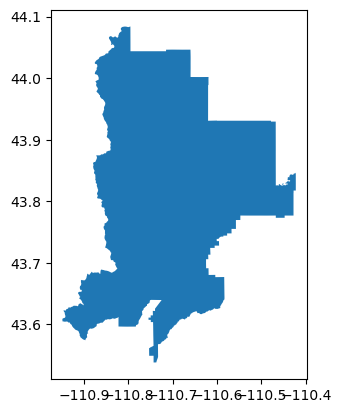

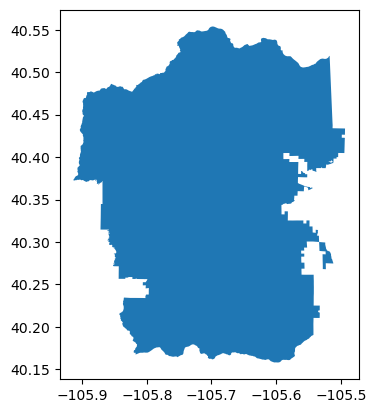

In [23]:
# plot 
teton_gdf.plot(
    cmap = ''
)
rmnp_gdf.plot(
    cmap = ''
)

 Get bounds for downloading the soil data 


In [24]:
#Get Soil URLS for data 

def soil_urls_get(gdf):

    """
    Creates a list of Urls to download soil data from POLARIS 

    Parameters:
    gdf: A geodata frame containing spatial data 

    Returns:
    A list of soil URLs from polars, with the default depth set at 15-30 cm and ph as the parameter chosen, as well as a mean from the data set
    """

    soil_url_template = (
        "http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0"
        #ph of soil 
        "/ph"
        #mean of ph soil datas
        "/mean"
        #depth of soil 
        "/0-5"
        #lat and long of soil (they are in 1 deg by 1 deg cells)
        "/lat{min_lat}{max_lat}_lon{min_lon}{max_lon}.tif")
        
    bound_min_lon, bound_min_lat, bound_max_lon, bound_max_lat = gdf.total_bounds

    soil_url_list = []

    for min_lon in range(floor(bound_min_lon), ceil(bound_max_lon)):
        for min_lat in range(floor(bound_min_lat), ceil(bound_max_lat)):
            soil_url = soil_url_template.format(
                min_lat=min_lat, max_lat=min_lat+1,
                min_lon=min_lon, max_lon=min_lon+1)
            soil_url_list.append(soil_url)
    return soil_url_list

 
teton_soils_urls = soil_urls_get(teton_gdf)
rmnp_soils_urls = soil_urls_get(rmnp_gdf)

teton_soils_urls, rmnp_soils_urls

(['http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/0-5/lat4344_lon-111-110.tif',
  'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/0-5/lat4445_lon-111-110.tif'],
 ['http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/0-5/lat4041_lon-106-105.tif'])

Now to download the data and crop it

[-110.94842128   43.53792539 -110.42273609   44.08400735]
[-105.91371538   40.1580685  -105.49358262   40.55378941]


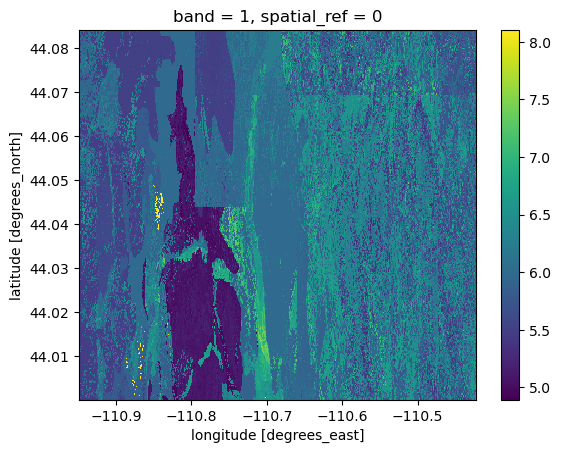

In [25]:
def process_image_and_crop(url_list,bounds_gdf,data_dir):
     """
    Takes a list of images downloaded from a URL, downloads them, and crops them based on bounds from a geodata frame 

    Parameters:
    url:  A url with a list imaged 
    gdf: A geodata frame containing spatial data 

    Returns:
    A set of cropped images with a geodata frame 
    """
     for url in url_list:
          filename = os.path.basename(url)
          filepath = os.path.join(data_dir, filename)
          if not os.path.exists(filepath):
               response = requests.get(url)
               with open(filepath, "wb") as file:
                    file.write(response.content)
     da = rxr.open_rasterio(filepath, mask_and_scale=True).squeeze()
          #Get AOI bounds
     bounds = (
               bounds_gdf
               .to_crs(da.rio.crs)
               .total_bounds
          )
     print(bounds)
     cropped_da = da.rio.clip_box(*bounds)

     return cropped_da 

teton_ph = process_image_and_crop(teton_soils_urls, teton_gdf, soil_data_dir)
rmnp_ph  = process_image_and_crop(rmnp_soils_urls, rmnp_gdf, soil_data_dir)
teton_ph.plot()


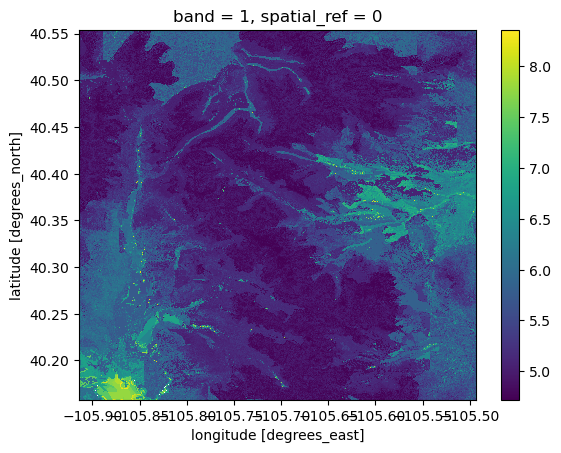

In [26]:
rmnp_ph.plot()

In [27]:
%store habitat_data_dir teton_gdf rmnp_gdf aoi_gdf

Stored 'habitat_data_dir' (str)
Stored 'teton_gdf' (GeoDataFrame)
Stored 'rmnp_gdf' (GeoDataFrame)
Stored 'aoi_gdf' (GeoDataFrame)
